In [6]:
import mlflow
import logging
import time
import pandas as pd
import mlflow.sklearn as ms
import dagshub
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import numpy as np

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.filterwarnings("ignore")

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
mlflow.set_tracking_uri('https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow')

dagshub.init(repo_owner='nafiul-araf', repo_name='Drug-Review-Project-MLFlow-', mlflow=True)

mlflow.set_experiment('Hyperparameter Tuning with MultinomialNB')

Initialized MLflow to track repo "nafiul-araf/Drug-Review-Project-MLFlow-"

Repository nafiul-araf/Drug-Review-Project-MLFlow- initialized!

<Experiment: artifact_location='mlflow-artifacts:/49067400acff453fa2fa131cb36bd956', creation_time=1746873363299, experiment_id='2', last_update_time=1746873363299, lifecycle_stage='active', name='Hyperparameter Tuning with MultinomialNB', tags={}>

In [ ]:
def transform_text(text):
    "Transform the text by text lowering, tokenizing, removing special characters, stopwords, punctuations and stemming."
    
    # Lower case the text
    text = text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)

    # Remove special characters
    text = [word for word in text if word.isalnum()]

    # Remove stopwords and punctuations
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]

    # Stemming the texts
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text]

    # Join the tokens back into a single string
    return ' '.join(text)

def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        df = df[['review', 'rating']]
        df.loc[:, 'review'] = df['review'].apply(transform_text)
        df['rating'] = df['rating'].map({'positive': 1, 'negative': 0}).infer_objects(copy=False)
        df = df.drop_duplicates()
        df = df.reset_index(drop=True)
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        raise

def preprocess():
    data = load_data('data.csv')
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data['review'])
    y = data['rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    return X_train, X_test, y_train, y_test, vectorizer

Params: {'alpha': 0.01, 'fit_prior': True} | Accuracy: 0.7225 | F1: 0.8034


2025/05/11 12:35:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run MultinomialNB with params: {'alpha': 0.01, 'fit_prior': True} at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2/runs/bef0a2d66234445286ecb12af6c4fe98.
2025/05/11 12:35:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2.


Params: {'alpha': 0.01, 'fit_prior': False} | Accuracy: 0.7120 | F1: 0.7886


2025/05/11 12:35:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run MultinomialNB with params: {'alpha': 0.01, 'fit_prior': False} at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2/runs/cb5b30c82b504bd5b560fc46d00a829a.
2025/05/11 12:35:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2.


Params: {'alpha': 0.1, 'fit_prior': True} | Accuracy: 0.7290 | F1: 0.8060


2025/05/11 12:35:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run MultinomialNB with params: {'alpha': 0.1, 'fit_prior': True} at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2/runs/4c253cffd37b4b498e374b3c1f58f61c.
2025/05/11 12:35:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2.


Params: {'alpha': 0.1, 'fit_prior': False} | Accuracy: 0.7071 | F1: 0.7801


2025/05/11 12:35:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run MultinomialNB with params: {'alpha': 0.1, 'fit_prior': False} at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2/runs/a330e3f0dcc24f268ab68b936c2ba861.
2025/05/11 12:35:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2.


Params: {'alpha': 0.5, 'fit_prior': True} | Accuracy: 0.7476 | F1: 0.8205


2025/05/11 12:35:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run MultinomialNB with params: {'alpha': 0.5, 'fit_prior': True} at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2/runs/4a2845062a5b4807b111c78a03e32b49.
2025/05/11 12:35:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2.


Params: {'alpha': 0.5, 'fit_prior': False} | Accuracy: 0.7233 | F1: 0.7932


2025/05/11 12:35:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run MultinomialNB with params: {'alpha': 0.5, 'fit_prior': False} at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2/runs/5a370d6e1ba54a33821072f4e8ceb5e3.
2025/05/11 12:35:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2.


Params: {'alpha': 1.0, 'fit_prior': True} | Accuracy: 0.7775 | F1: 0.8491


2025/05/11 12:35:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run MultinomialNB with params: {'alpha': 1.0, 'fit_prior': True} at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2/runs/50922f479e5747e08c27263dd73ac9c8.
2025/05/11 12:35:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2.


Params: {'alpha': 1.0, 'fit_prior': False} | Accuracy: 0.7605 | F1: 0.8293


2025/05/11 12:35:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run MultinomialNB with params: {'alpha': 1.0, 'fit_prior': False} at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2/runs/d776cab84b6c4d7a99fc1eb6dee3a389.
2025/05/11 12:35:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2.


Params: {'alpha': 2.0, 'fit_prior': True} | Accuracy: 0.7743 | F1: 0.8554


2025/05/11 12:35:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run MultinomialNB with params: {'alpha': 2.0, 'fit_prior': True} at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2/runs/459511f06941496e8a95da2867c44d1b.
2025/05/11 12:35:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2.


Params: {'alpha': 2.0, 'fit_prior': False} | Accuracy: 0.7832 | F1: 0.8561


2025/05/11 12:35:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run MultinomialNB with params: {'alpha': 2.0, 'fit_prior': False} at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2/runs/5e38edd8d4db4c599a04ffe626a51165.
2025/05/11 12:35:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2.


Params: {'alpha': 5.0, 'fit_prior': True} | Accuracy: 0.7338 | F1: 0.8418


2025/05/11 12:36:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run MultinomialNB with params: {'alpha': 5.0, 'fit_prior': True} at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2/runs/daaf3987226647ecbf7044939971980d.
2025/05/11 12:36:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2.


Params: {'alpha': 5.0, 'fit_prior': False} | Accuracy: 0.7346 | F1: 0.8402


2025/05/11 12:36:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run MultinomialNB with params: {'alpha': 5.0, 'fit_prior': False} at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2/runs/1467f75f5eab44e2b17a1f732a919f82.
2025/05/11 12:36:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2.
2025/05/11 12:36:23 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



Best Params: {'alpha': 2.0, 'fit_prior': True} | Best F1 Score: 0.8393


2025/05/11 12:36:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run honorable-koi-675 at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2/runs/ea794947c2c14de6b2ed1d4ef07258d2.
2025/05/11 12:36:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/nafiul-araf/Drug-Review-Project-MLFlow-.mlflow/#/experiments/2.


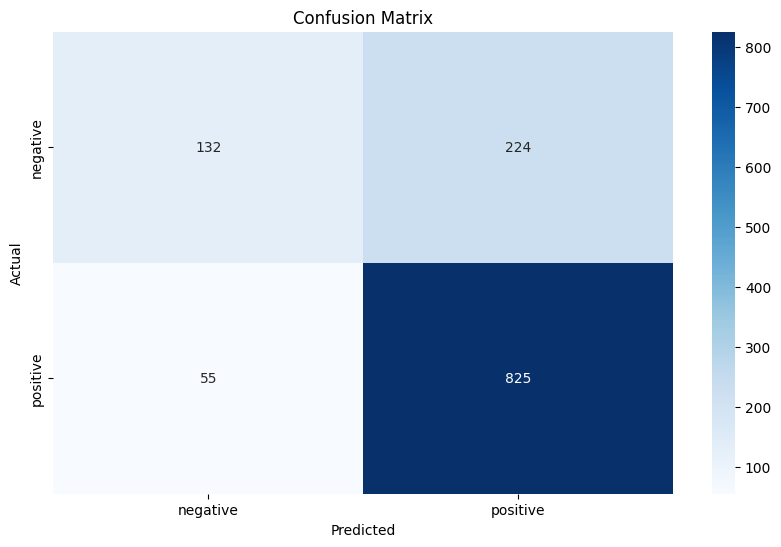

In [9]:
def train_and_log_data(X_train, X_test, y_train, y_test, vectorizer):
    """Trains a Multinomial Naive Bayes model with GridSearch and logs results to MLflow."""
    
    params_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
    'fit_prior': [True, False]
    }

    with mlflow.start_run():
        grid_search = GridSearchCV(MultinomialNB(), params_grid, cv=5, scoring="f1", n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Log all hyperparameter tuning runs
        for params, mean_score, std_score in zip(grid_search.cv_results_["params"], 
                                                 grid_search.cv_results_["mean_test_score"], 
                                                 grid_search.cv_results_["std_test_score"]):
            with mlflow.start_run(run_name=f"MultinomialNB with params: {params}", nested=True):
                model = MultinomialNB(**params)
                model.fit(X_train, y_train)
                
                y_pred = model.predict(X_test)
                
                metrics = {
                    "accuracy": accuracy_score(y_test, y_pred),
                    "precision": precision_score(y_test, y_pred),
                    "recall": recall_score(y_test, y_pred),
                    "f1_score": f1_score(y_test, y_pred),
                    "mean_cv_score": mean_score,
                    "std_cv_score": std_score
                }
                
                # Log parameters & metrics
                mlflow.log_params(params)
                mlflow.log_metrics(metrics)
                
                print(f"Params: {params} | Accuracy: {metrics['accuracy']:.4f} | F1: {metrics['f1_score']:.4f}")

        # Log the best model
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        best_f1 = grid_search.best_score_
        pred_y = best_model.predict(X_test)
        cm = confusion_matrix(y_test, pred_y)
        plt.figure(figsize=(10, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.savefig('confusion_matrix.png')

        
        mlflow.log_artifact('confusion_matrix.png')
        mlflow.log_params(best_params)
        mlflow.log_metric("best_f1_score", best_f1)
        mlflow.sklearn.log_model(best_model, "model")
        
        print(f"\nBest Params: {best_params} | Best F1 Score: {best_f1:.4f}")

# ==========================
# Main Execution
# ==========================    

if __name__ == "__main__":
    X_train, X_test, y_train, y_test, vectorizer = preprocess()
    train_and_log_data(X_train, X_test, y_train, y_test, vectorizer)